In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t,norm, multivariate_normal
from mpl_toolkits.mplot3d import axes3d
import math

In [2]:
def sample_abs_std_normal(N):
    res = []
    f = lambda x : (2/np.sqrt(2*math.pi))*math.exp(-x**2/2) * int(x > 0)
    c = np.sqrt(2*math.exp(1)/math.pi)
    g = lambda x : math.exp(-x) * int(x > 0)
    inv_g = lambda u : -math.log(1-u) * int(u > 0 and u < 1)
    for _ in range(N):
        while True:
            U = np.random.rand()
            x = inv_g(np.random.rand())
            if c*U*g(x) <= f(x):
                break
        res.append(x)
    return res

def sample_abs_std_normal(N):
    res = []

    f = lambda x : 2 / np.sqrt(2*np.pi) * np.exp(-x**2/2) * int(x>0)
    g = lambda x : np.exp(-x) * int(x>0)
    inv_cdf_g = lambda x : -np.log(1-x) * int(x>0 and x<1)
    c = np.sqrt(2 * np.e / np.pi)

    for _ in range(N):
        while True:
            U = np.random.rand()

            U_ = np.random.rand()
            Y = inv_cdf_g(U_)

            if U < f(Y) / (c * g(Y)):
                break
        res.append(Y)
    
    return res

def sample_std_normal(N):
    return [np.random.choice([-1,1]) * _ for _ in sample_abs_std_normal(N)]

def sample_normal(N, mu, sigma):
    return [(_ * sigma) + mu for _ in sample_std_normal(N)]

# Exercise 1

In [4]:
Sx = [-1, 0, 1]
Px = [1/3, 1/6, 1/2]

## 1. Determine P(Y = -1) and P(Y = 1) such that E[X] = E[Y]

$$\mathbb{E}[X] = \sum_{k}^{+\infty}k\mathbb{P}(X = k) = (-1)\mathbb{P}(X=-1) + (0)\mathbb{P}(X=0) + (1)\mathbb{P}(X=1)$$
$$\mathbb{E}[X] = \mathbb{E}[Y] = -\frac{1}{3} + \frac{1}{2} = \frac{1}{6}$$
So, $$\mathbb{E}[Y]  = -\mathbb{P}(Y=-1) + \mathbb{P}(Y=1) = \frac{1}{6}\hspace{2mm}(1)$$
But also, $$\sum_{k = -1}^{1}\mathbb{P}(Y = k) = 1$$
$$\mathbb{P}(Y=-1) + \frac{4}{5} + \mathbb{P}(Y=1) = 1$$
$$\mathbb{P}(Y=-1) + \mathbb{P}(Y=1) = 1 - \frac{4}{5} = \frac{1}{5}\hspace{2mm}(2)$$
By (1) and (2), we have $$\mathbb{P}(Y=1)=\frac{11}{60}\hspace{2mm},\hspace{2mm}\mathbb{P}(Y=-1)=\frac{1}{60}$$

## 2. Compute Var(X) and Var(Y) and compare

$$Var(X) = \mathbb{E}[X^2] - \mathbb{E}^2[X]$$

$$\mathbb{E}[X^2]=\sum_{k = -1}^{1}k^{2}\mathbb{P}(X = k)$$

In [5]:
E_x2 = sum(k**2 * Px[i] for k,i in zip(Sx,[0,1,2]))
E_x = (sum(k * Px[i] for k,i in zip(Sx,[0,1,2])))

In [6]:
VarX = E_x2 - E_x**2
VarX

0.8055555555555555

$$Var(Y) = \mathbb{E}[Y^2] - \mathbb{E}^2[Y]$$

In [7]:
Sy = [-1, 0, 1]
Py = [1/60, 4/5, 11/60]

In [8]:
E_y2 = sum(k**2 * Py[i] for k,i in zip(Sy,[0,1,2]))
E_y = (sum(k * Py[i] for k,i in zip(Sy,[0,1,2])))

In [9]:
VarY = E_y2 - E_y**2
VarY

0.17222222222222222

Hence, $$Var(X) > Var(Y)$$

### 3. For N = 1,..,100, display on the same graphic the functions N -> $\bar{X}_{N}$ and N -> $\bar{Y}_{N}$ 

In [10]:
def sample(support, probab, size):
    res = []
    for _ in range(size):
        U = np.random.rand()
        if U > 0 and U <= probab[0]:
            res.append(support[0])
        elif U > probab[0] and U <= probab[0]+probab[1]:
            res.append(support[1])
        else:
            res.append(support[2])
    return res

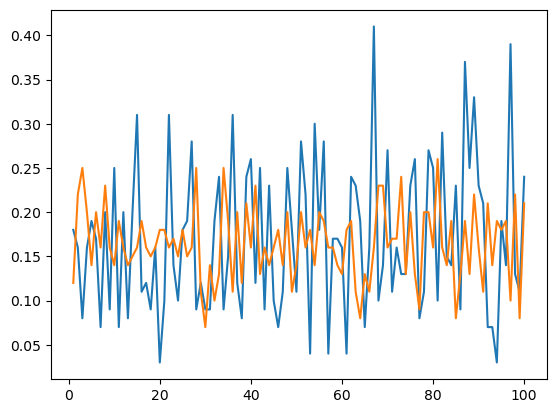

In [37]:
N = 100

X_bar = [np.mean(sample(Sx,Px,N)) for _ in range(1,N+1)]
Y_bar = [np.mean(sample(Sy,Py,N)) for _ in range(1,N+1)]

plt.plot([i for i in range(1,N+1)], X_bar)
plt.plot([i for i in range(1,N+1)], Y_bar)

comment: Interval of $\bar{Y}$ is smaller than $\bar{X}$

## 4. Plot in two different graphics each function with 95% CI

$\displaystyle \big[\, \overline{X}_{N}-\frac{S_{N}}{\sqrt{N}}\,F^{-1}_{T_{N-1}}(1-\frac{\alpha}{2}) 
                         ;  \, \overline{X}_{N}+\frac{S_{N}}{\sqrt{N}}\,F^{-1}_{T_{N-1}}(1-\frac{\alpha}{2})\big]$


In [38]:
# 95% so alpha = 0.05
alpha = 0.05
F = t.ppf(1-alpha/2, N-1, loc=0, scale=1)
variance = max(sum([X_ - X_bar_ for X_,X_bar_ in zip(sample(Sx,Px,N),X_bar)])/(len(sample(Sx,Px,N))-1), 0)
sup = [X_bar_ + (np.sqrt(variance)/np.sqrt(N))*F for X_bar_ in X_bar]
inf = [X_bar_ - (np.sqrt(variance)/np.sqrt(N))*F for X_bar_ in X_bar]

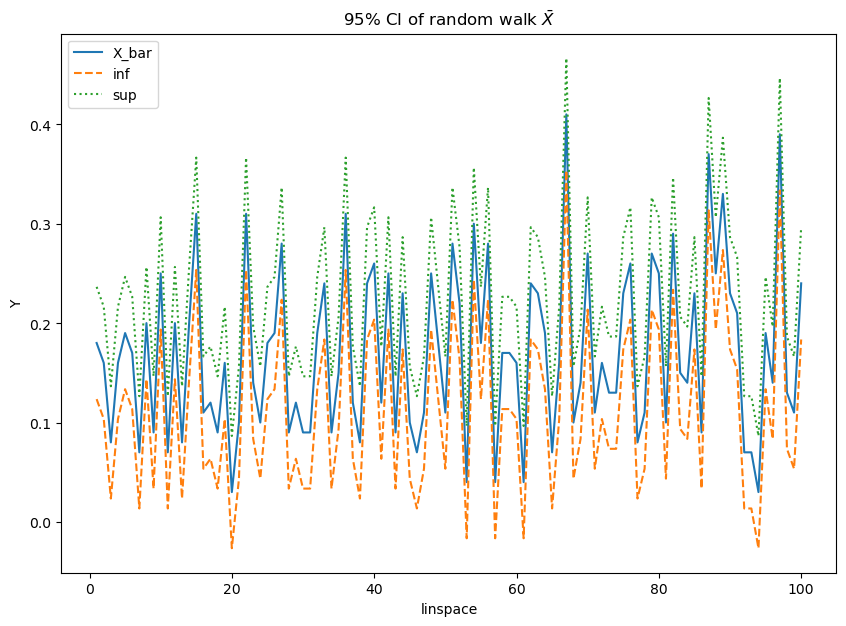

In [39]:
plt.figure(figsize=(10, 7)) 

# Plot your data
plt.plot([i for i in range(1, N+1)], X_bar, label='X_bar')
plt.plot([i for i in range(1, N+1)], inf, linestyle='--', label='inf')
plt.plot([i for i in range(1, N+1)], sup, linestyle=':', label='sup')

# Add labels, title, legend, etc. if desired
plt.xlabel('linspace')
plt.ylabel('Y')
plt.title(r'95% CI of random walk $\bar{X}$')
plt.legend()

plt.show()

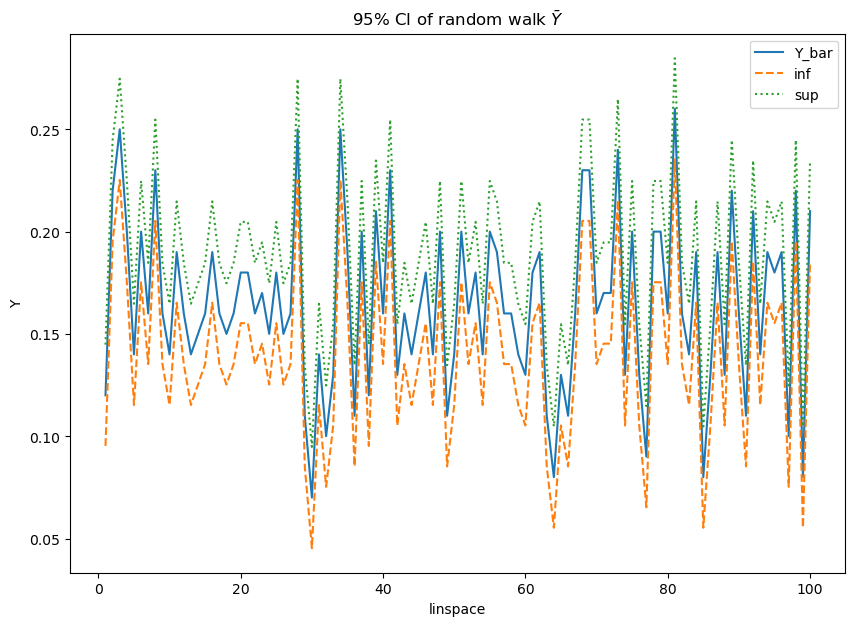

In [49]:
# 95% so alpha = 0.05
alpha = 0.05
F = t.ppf(1-alpha/2, N-1, loc=0, scale=1)
variance = max(sum([Y_ - Y_bar_ for Y_,Y_bar_ in zip(sample(Sy,Py,N), Y_bar)])/(len(sample(Sy,Py,N))-1), 0)
sup = [Y_bar_ + (np.sqrt(variance)/np.sqrt(N))*F for Y_bar_ in Y_bar]
inf = [Y_bar_ - (np.sqrt(variance)/np.sqrt(N))*F for Y_bar_ in Y_bar]

plt.figure(figsize=(10, 7)) 

# Plot your data
plt.plot([i for i in range(1, N+1)], Y_bar, label='Y_bar')
plt.plot([i for i in range(1, N+1)], inf, label='inf', linestyle='--')
plt.plot([i for i in range(1, N+1)], sup, label='sup', linestyle=':')

# Add labels, title, legend, etc. if desired
plt.xlabel('linspace')
plt.ylabel('Y')
plt.title(r'95% CI of random walk $\bar{Y}$')
plt.legend()

# Exercise 3

In [50]:
#2.

mu = 0
n = 30
x0 = 20 
sigma = 0.9
a = 12 
b = 32
N = 10**5

Y = sample_std_normal(n)

h = lambda x : min(np.abs(x - a), np.abs(x - b))

def generate_next_X(X):
    k = len(X)-1 #last index
    return (X[k] * np.exp((mu - sigma**2/2)/n + sigma * np.sqrt(1/n) * sample_std_normal(1)[0]))

def simulate_X(X, size):
    for _ in range(size-1):
        X.append(generate_next_X(X))
    return X

In [51]:
Xn = [simulate_X([x0], n) for _ in range(N)]

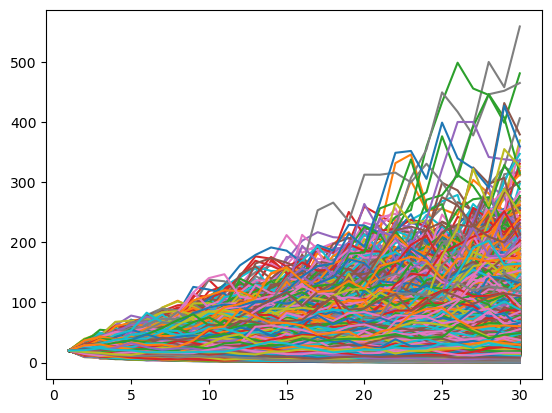

In [ ]:
for j in range(N):
    plt.plot([_ for _ in range(1,len(Xn[j])+1)], Xn[j])

In [ ]:
# slide 28th MC
MC_approx = sum(h(Xn[k][-1]) * (1 - np.prod([int(X_k >= a and X_k <= b) for X_k in Xn[k]])) for k in range(N)) / N
MC_approx

7.743624275709777

In [ ]:
#3.

mu = 0
n = 30
x0 = 20
a = 12
b = 32
sigma = 0.9

Xn = [simulate_X([x0], n) for _ in range(N)]
MC_approx = sum(h(Xn[k][-1]) * (1 - np.prod([int(X_k >= a and X_k <= b) for X_k in Xn[k]])) for k in range(N)) / N

alpha = 0.05
CI = (MC_approx - norm.ppf(1-alpha/2)*sigma/np.sqrt(N), MC_approx + norm.ppf(1-alpha/2)*sigma/np.sqrt(N))
CI

(7.775437782605571, 7.786594093187053)

In [ ]:
mu = 0
n = 30
x0 = 20
a = 12
b = 32
sigma = 0.2

Xn = [simulate_X([x0], n) for _ in range(N)]
MC_approx = sum(h(Xn[k][-1]) * (1 - np.prod([int(X_k >= a and X_k <= b) for X_k in Xn[k]])) for k in range(N)) / N

alpha = 0.05
CI = (MC_approx - norm.ppf(1-alpha/2)*sigma/np.sqrt(N), MC_approx + norm.ppf(1-alpha/2)*sigma/np.sqrt(N))
CI

(0.026835780097645836, 0.02931496022686408)

# Exercise 4

In [ ]:
#1.a

T = 1
n = 50
sigma1 = 0.5
sigma2 = 0.8
r = 0.03
x0 = 50
y0 = 60
K = 55

rho = 0

In [ ]:
gen_X = lambda current_x : current_x * ((1+r*(T/n)) + sigma1*np.sqrt(T/n)*sample_std_normal(1)[0])
gen_Y = lambda current_y : current_y * ((1+r*(T/n)) + rho*sigma2*np.sqrt(T/n)*sample_std_normal(1)[0] + sigma2*np.sqrt(1-rho**2)*np.sqrt(T/n)*sample_std_normal(1)[0])

In [ ]:
def sample_X(list_x, size):
    res = list_x[:]
    for _ in range(size-1):
        res.append(gen_X(res[-1])) #get last element of list_x
    return res

def sample_Y(list_y, size):
    res = list_y[:]
    for _ in range(size-1):
        res.append(gen_Y(res[-1])) #get last element of list_y
    return res

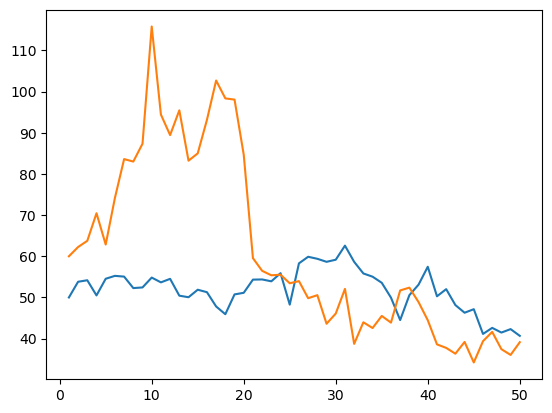

In [ ]:
Xn = sample_X([x0], n)
Yn = sample_Y([y0], n)
plt.plot([_ for _ in range(1,n+1)], Xn)
plt.plot([_ for _ in range(1,n+1)], Yn)

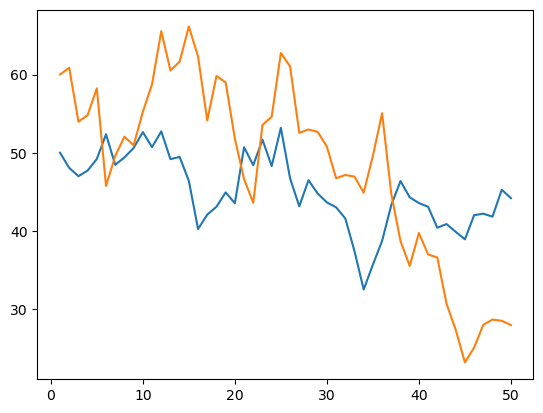

In [ ]:
rho = -0.9
Xn = sample_X([x0], n)
Yn = sample_Y([y0], n)
plt.plot([_ for _ in range(1,n+1)], Xn)
plt.plot([_ for _ in range(1,n+1)], Yn)

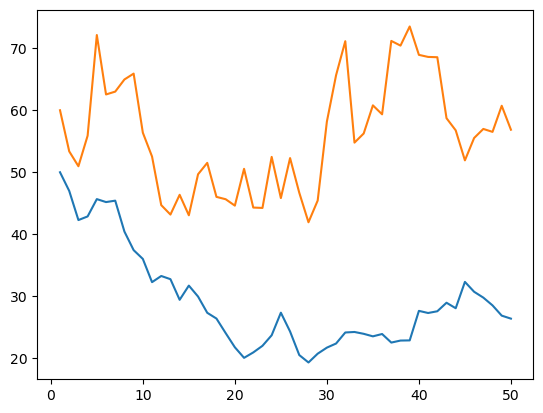

In [ ]:
rho = 0.9
Xn = sample_X([x0], n)
Yn = sample_Y([y0], n)
plt.plot([_ for _ in range(1,n+1)], Xn)
plt.plot([_ for _ in range(1,n+1)], Yn)

In [ ]:
#1.b.

rho = 0
N = 1000

#Xn is a random walk, here we simulate N random walks then take last element at each element for MC 
X_tn = [sample_X([x0], n) for _ in range(N)] 
Y_tn = [sample_Y([y0], n) for _ in range(N)]

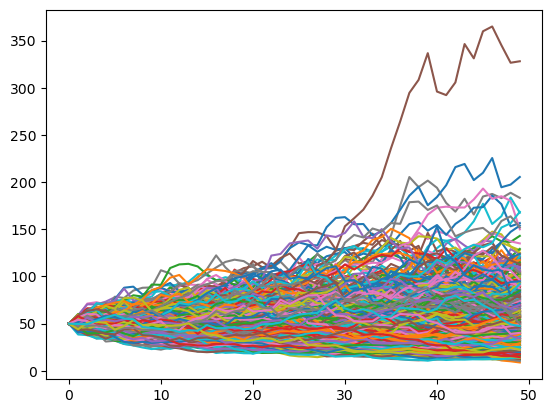

In [ ]:
for j in range(N):
    plt.plot([_ for _ in range(0,n)], X_tn[j])

In [ ]:
#X_tn[k][-1] last element of k-th random walk

MC_approx = sum([max(np.exp(-r*T)*(0.5 * X_tn[k][-1] + 0.5 * Y_tn[k][-1] - K), 0) for k in range(N)])/N
MC_approx

10.854884269773574

In [ ]:
#1.c. CI 95%

alpha = 0.05
F = norm.ppf(1 - alpha/2, loc=0, scale=1) #inv 0.975
Sn = sum([(max(np.exp(-r*T)*(0.5 * X_tn[k][-1] + 0.5 * Y_tn[k][-1] - K), 0) - MC_approx)**2 for k in range(N)])/N

inf = MC_approx - F * np.sqrt(Sn)/np.sqrt(N)
sup = MC_approx + F * np.sqrt(Sn)/np.sqrt(N)
CI = (inf, sup)
CI

(9.33337473230077, 12.376393807246378)

# Exercise 5

### 1. Choose $\sigma_{ij}$ to get desired $\rho$

we know $$\sigma_{11} = \sigma_{21} = \theta = 0$$
$$\sigma_{12} = 1$$
sub them all in $\rho$ then we have $$\sigma_{22} = \frac{\rho}{1-\rho}$$

In [4]:
def get_sigma(rho):
    sigma11 = 0
    sigma21 = 0
    sigma12 = 1
    sigma22 = rho/(sigma12 - rho)
    return [sigma11, sigma12, sigma21, sigma22]

def get_rho(s11, s12, s21, s22):
    s1 = np.sqrt(s11**2 + s12**2)
    s2 = np.sqrt(s21**2 + s22**2)
    rho = (s11*s21 + s12*s22) /  (s1*s2)
    return rho

def valeur_rho(alpha,theta2): #get_sigma
    import math
    theta1=(1+math.sqrt(1-alpha**2))*theta2/(1.0*alpha)
    return [theta1,theta2]

In [107]:
sigma = valeur_rho(0.95,1) #theta1 = sigma11 = sigma22
sigma

[1.3813156841262315, 1]

In [108]:
sigma = valeur_rho(-0.95,1)
sigma

[-1.3813156841262315, 1]

In [101]:
# def density_z1z2(z1, z2, s, rho):
#     s11 = s22 = s[0] #s[0] is theta1
#     s12 = s21 = s[1]
#     s1 = np.sqrt(s11**2 + s12**2)
#     s2 = np.sqrt(s21**2 + s22**2)
#     z = [(u**2)/(s1**2) - (2*rho*u*v)/(s1*s2) + (v**2)/(s2**2) for u,v in zip(z1,z2)]
#     return [np.exp(-z_/(2*(1-rho**2)))/(2*np.pi*s1*s2*np.sqrt(1-rho**2)) for z_ in z]

def density_z1z2(z1, z2, s, rho):
    s11 = s22 = s[0] #s[0] is theta1
    s12 = s21 = s[1]
    s1 = np.sqrt(s11**2 + s12**2)
    s2 = np.sqrt(s21**2 + s22**2)
    z = (z1**2)/(s1**2) - (2*rho*z1*z2)/(s1*s2) + (z2**2)/(s2**2)
    return np.exp(-z/(2*(1-rho**2)))/(2*np.pi*s1*s2*np.sqrt(1-rho**2))

In [61]:
rho = [-0.95, 0.95]
s = valeur_rho(rho[0], 1)
N = 1000
X1 = sample_std_normal(N)
X2 = sample_std_normal(N)
Z1 = [s[0]*a + s[1]*b for a,b in zip(X1,X2)]
Z2 = [s[1]*a + s[0]*b for a,b in zip(X1,X2)]

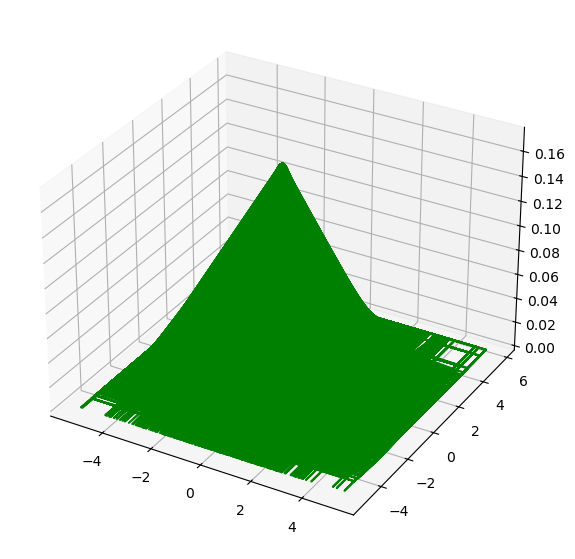

In [62]:
X, Y = np.meshgrid(Z1,Z2)
Z = [density_z1z2(X_, Y_, s, rho[0]) for X_,Y_ in zip(X,Y)]

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, np.asarray(Z), rstride=2, 
                  cstride=2,color='green')

In [68]:
#3. 

def Normale_BM():
    def Exp_va(LLambda):
        return -1.0*np.log(1.0-np.random.rand())/(1.0*LLambda)
    def Unifab_va(a,b):
        return min(a,b)+(max(a,b)-min(a,b))*np.random.rand()
    U=np.sqrt(Exp_va(0.5))*np.cos(Unifab_va(0,2*np.pi))
    V=np.sqrt(Exp_va(0.5))*np.sin(Unifab_va(0,2*np.pi))
    return U,V

In [67]:
def generate_Z(rho, sigma, size):
    s11 = s22 = sigma[0] #s[0] is theta1
    s12 = s21 = sigma[1]
    X1 = sample_std_normal(size)
    X2 = sample_std_normal(size)
    Z1 = [s11*a + s12*b for a,b in zip(X1,X2)]
    Z2 = [s21*a + s22*b for a,b in zip(X1,X2)]
    return (Z1, Z2)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
2 0
2 1
2 2
2 3
2 4


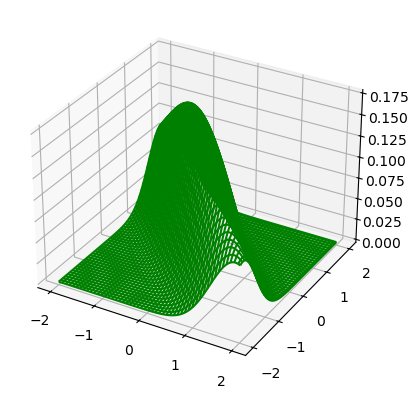

In [65]:
x1 = np.linspace(-2,2,100)
x2 = np.linspace(-2,2,100)
x,y = np.meshgrid(x1,x2)

z = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        print(i,j)
        z[i,j] = density_z1z2(x[i,j], y[i,j], s, rho[0])

fig = plt.figure()
wf = plt.axes(projection ='3d')
wf.plot_wireframe(x, y, z, color ='green')
plt.show()

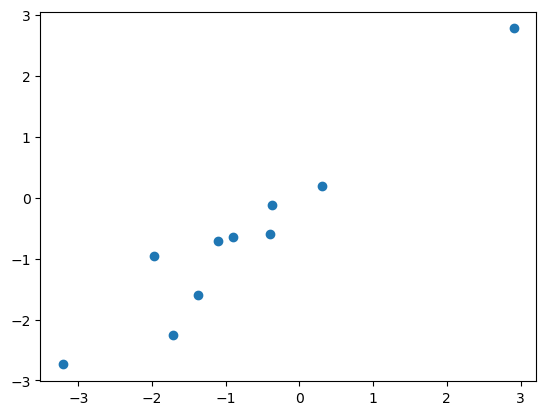

In [ ]:
rho = 0.95
N = 10
vector_Z = generate_Z(rho, valeur_rho(rho,1), N)
plt.scatter(vector_Z[0], vector_Z[1])

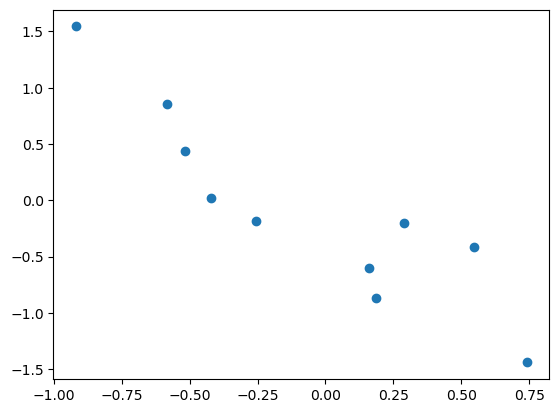

In [ ]:
rho = -0.95
N = 10
vector_Z = generate_Z(rho, valeur_rho(rho,1), N)
plt.scatter(vector_Z[0], vector_Z[1])

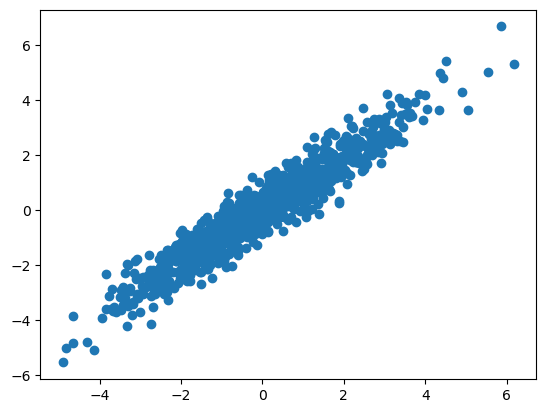

In [ ]:
#4. 

rho = 0.95
N = 1000
vector_Z = generate_Z(rho, valeur_rho(rho,1), N)
plt.scatter(vector_Z[0], vector_Z[1])

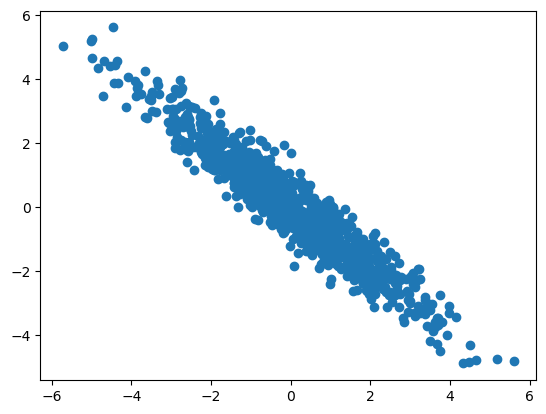

In [ ]:
rho = -0.95
N = 1000
vector_Z = generate_Z(rho, valeur_rho(rho,1), N)
plt.scatter(vector_Z[0], vector_Z[1])

In [71]:
#5.

rho = -0.95
N = 1000
vector_Z = generate_Z(rho, valeur_rho(rho,1), N)
np.shape(vector_Z)

(2, 1000)

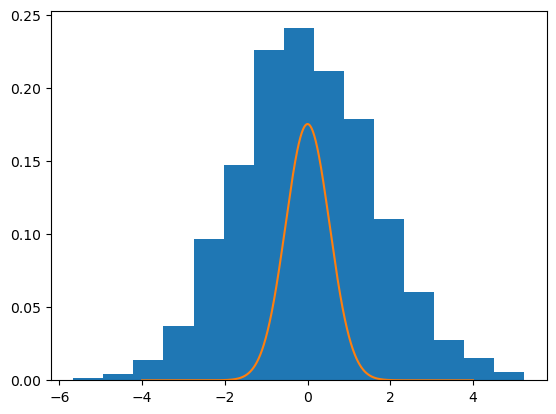

In [95]:
plt.hist(vector_Z[0], density=True, bins=15)
plt.plot(np.linspace(-4,4,N), [density_z1z2(Z_, 0, s, rho) for Z_ in np.linspace(-4,4,N)])

In [102]:
#6. CI 

h = lambda z1,z2 : np.exp(z1 + z2)

def simulate_MC_Z(Z): #Z = [Z1, Z2]
    res = sum([h(A,B) for A,B in zip(Z[0],Z[1])])/len(Z[0])
    return res

In [103]:
N = 10**5 
rho = -0.95
vecteur_Z = generate_Z(rho, valeur_rho(rho, 1), N)
simulate_MC_Z(vecteur_Z)

1.1559388322790471

MC approximation converges to the $\mathbb{E}$ $$\frac{1}{N}\sum_{i=1}^{N}h(Z_{1}^{(i)}, Z_{2}^{(i)}) \rightarrow \mathbb{E}[h(Z_{1},Z_{2})]$$ 
and since variance is unknown we have $$S_{n}^2 = \frac{1}{N-1}\sum_{i=1}^{N}[h(Z_{1}^{(i)}, Z_{2}^{(i)}) - \frac{1}{N}\sum_{i=1}^{N}h(Z_{1}^{(i)}, Z_{2}^{(i)})]$$

$$= \frac{1}{N-1}\sum_{i=1}^{N}[h(Z_{1}^{(i)}, Z_{2}^{(i)}) - \hat{\theta}_{N}]$$

by letting $$\hat{\theta}_{N} = \frac{1}{N}\sum_{i=1}^{N}h(Z_{1}^{(i)}, Z_{2}^{(i)})$$

For unknown variance we use student-t, so the confidence interval is given by $$[\hat{\theta}_{N} - t\frac{S_{N}}{\sqrt{N}}, \hat{\theta}_{N} + t\frac{S_{N}}{\sqrt{N}}]$$

Where t is the reciprocate function of CDF order $1-\frac{\alpha}{2}$ of student-t distrbution with $N-1$ degree of freedom: $F_{T_{N-1}}^{-1}(1-\frac{\alpha}{2})$

#https://stackoverflow.com/questions/60699836/how-to-use-norm-ppf#:~:text=Standard%20Normal%20Distribution,the%20standard%20deviation%20is%201).



In [107]:
mean = simulate_MC_Z(vecteur_Z)
Sn = np.sqrt(sum([h(A,B) - mean for A,B in zip(vecteur_Z[0], vecteur_Z[1])])/(N-1))
# inv_F = t.ppf(1-alpha/2, N-1, loc = mean, scale = Sn)
inv_F = norm.ppf(1-0.05/2)

In [110]:
inf = mean - (inv_F * Sn/np.sqrt(N))
sup = mean + (inv_F * Sn/np.sqrt(N))
CI = [inf, sup]
CI

[1.1559388313886125, 1.1559388331694818]

# Exercise 2

In [119]:
x0 = 25
T = 1
K = 25
r = 0.03

In [117]:
def normal_density(mu, sigma, x):
    return ( 1/np.sqrt(2*np.pi)*sigma**2 * np.exp(-(x-mu)**2/2*sigma**2) )

g = lambda x : np.exp(-r*T) * max((x0 * np.exp((r-(sigma**2/2))*T + sigma*np.sqrt(T)*x) - K), 0)
d1 = lambda sigma : (np.log(x0/K) + (r - sigma**2/2) * T) / (sigma * np.sqrt(T))
d2 = lambda sigma : d1(sigma) - sigma*np.sqrt(T)

c0 = lambda d1,d2 : (x0 * norm.cdf(d1)) - (K * np.exp(-r*T) * norm.cdf(d2))
c0_hat = lambda x : sum([g(x_) for x_ in x])/len(x)
Sn2 = lambda N,Xk,Mn : sum([(g(x_) - Mn)**2 for x_ in Xk])/(len(Xk)-1)

## 2. Complete table

In [56]:
table = {}
N_list = [10**3, 10**4, 10**5, 10**6]
sigma_list = [0.03, 0.2, 0.4, 0.9]
C0_list = []
C0_hat_list = []
error_list = []
Sn2_list = []

In [57]:
for sigma in sigma_list:
    C0_list.append(c0(d1(sigma), d2(sigma)))
table["C0"] = C0_list
table["C0"]

[0.8003315155914876, 2.31429405863223, 3.9832590087977513, 6.18158288414158]

In [58]:
for sigma in sigma_list:
    for N in N_list:
        Xk = sample_normal(N, 0, sigma)
        C0_hat_list.append(c0_hat(Xk))
table["C0_hat"] = C0_hat_list #C0_hat fills the table from left to right meaning for each sigma 
table["C0_hat"]

[0.7281811901207618,
 0.727651114045693,
 0.7276183381329785,
 0.7276377846522768,
 0.5881457086146035,
 0.523338967224344,
 0.5387639264419278,
 0.5354991299721851,
 1.2083140435705613,
 1.0757284725542517,
 1.1101349466985755,
 1.1162651945156985,
 6.635716064139327,
 7.166200648120392,
 7.005762249193037,
 6.925200528480588]

In [59]:
for i in range(0, len(sigma_list)):
    for j in range(4*i, (4*i)+4): #take each time 4 values of c0_hat to fill the table from left to right
        error_list.append(abs(C0_list[i] - C0_hat_list[j]))
table["Error"] = error_list #fill from left to right as well
table["Error"]

[0.07215032547072586,
 0.07268040154579458,
 0.07271317745850914,
 0.07269373093921083,
 1.7261483500176267,
 1.790955091407886,
 1.775530132190302,
 1.7787949286600448,
 2.7749449652271903,
 2.9075305362434998,
 2.873124062099176,
 2.866993814282053,
 0.45413317999774705,
 0.9846177639788118,
 0.8241793650514566,
 0.7436176443390083]

In [60]:
for sigma in sigma_list:
    for N in N_list:
        Xk = sample_normal(N, 0, sigma)
        Mn = c0_hat(Xk)
        Sn2_list.append(Sn2(N,Xk,Mn))
table["Sn2"] = Sn2_list #fill from left to right as well
table["Sn2"]

[0.000531429323530614,
 0.0005010249901262736,
 0.0005063672731958706,
 0.0005052206644578192,
 0.44258925287308193,
 0.4656628860760851,
 0.453119716579766,
 0.454413951330996,
 4.503955113708874,
 4.599978474041638,
 4.422739510894054,
 4.424982338997554,
 269.52679201945017,
 321.49839974154554,
 333.1831503003299,
 338.8472013200156]

## 3. Plot in the same graphic function N -> $\bar{Y_{N}}$

In [126]:
sigma = 0.9
N = 1000
X = sample_normal(N, 0, sigma)

In [156]:
Y_bar = []
Sn = []
inf = []
sup = []
for _ in range(1,N+1):
    X = sample_normal(_, 0, sigma)
    Y_bar.append(np.mean([g(X_) for X_ in X]))
    Sn.append(Sn2(_, X, Y_bar[-1]))
    inf.append(Y_bar[-1] - norm.ppf(1-alpha/2)*Sn[-1]/np.sqrt(_))
    sup.append(Y_bar[-1] + norm.ppf(1-alpha/2)*Sn[-1]/np.sqrt(_))


/var/folders/hs/jhbbsd052zz044qtbzkkhxl80000gn/T/ipykernel_5703/1596812699.py:10: RuntimeWarning: invalid value encountered in scalar divide
  Sn2 = lambda N,Xk,Mn : sum([(g(x_) - Mn)**2 for x_ in Xk])/(len(Xk)-1)


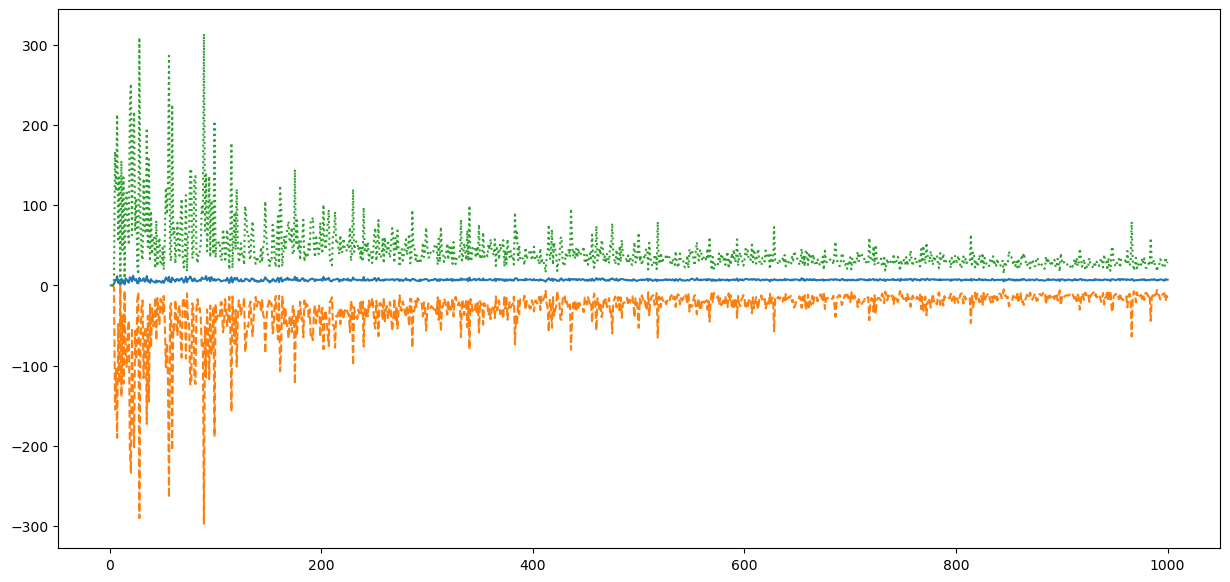

In [161]:
plt.figure(figsize=(15,7))

plt.plot([i for i in range(1,N+1)], Y_bar, label='MC')
plt.plot([i for i in range(1,N+1)], inf, label='Inf', linestyle='--')
plt.plot([i for i in range(1,N+1)], sup, label='Sup', linestyle=':')

For unknown variance we use student-t, so the confidence interval is given by $$[\hat{C}_{0} - t\frac{S_{N}}{\sqrt{N}}, \hat{C}_{0} + t\frac{S_{N}}{\sqrt{N}}]$$

## 4.  WRONG?

In [204]:
#4.c

A = [0, 3.5]
sigma = 0.9
N = 1000
psi = sample_std_normal(N)

In [167]:
f_K = lambda mu,psi : (g(mu+psi)**2 * np.exp(-(((mu+psi)/sigma)**2 - psi**2)))/sigma**2

In [168]:
def K_tilde(mu, psi): #psi is a sample, mu is a value, N size, !NO SIGMA COS IT IS KNOWN CONSTANTE
    return sum([f_K(mu,psi_) for psi_ in psi])/len(psi)

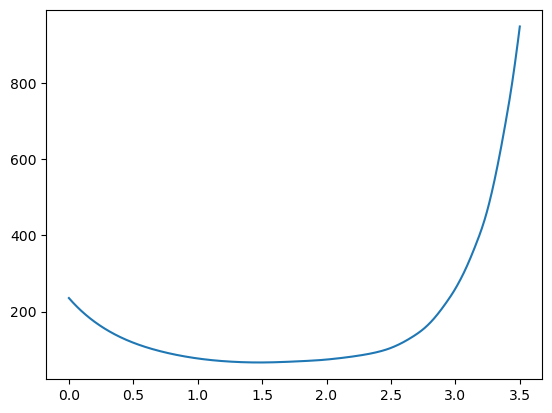

In [205]:
mu_vals = np.linspace(A[0], A[1], N)
k_tilde_vals = [K_tilde(mu_, psi) for mu_ in mu_vals]
plt.plot(mu_vals, k_tilde_vals)

In [178]:
#4.d) find mu_star 

# in slide psi is x, psi is a value not list
def get_l(mu, psi):
    return (np.exp(-( ((mu+psi)/sigma)**2 - psi**2 ))/sigma**2)

def get_g(mu, psi):
    return g(mu + psi)

# so K = g^2(mu)*l(u)

#derive g with respect to x
g_prime = lambda x : x0 * np.exp(-(sigma**2/2)*T + sigma*np.sqrt(T)*x) * sigma * np.sqrt(T) * int(x0 > 0 and r > 0 and sigma > 0 and K > 0 and T > 0)

def first_dev(mu, psi):
    return ((2*get_l(mu,psi)*get_g(mu,psi)) * (g_prime(psi) - (psi + mu)*get_g(mu,psi)))

def second_dev(mu, psi):
    return (2*get_l(mu, psi)) * ( (get_g(mu,psi)**2 * (2*(psi+mu)**2 - 1)) + 
                                 g_prime(psi) * (g_prime(psi) + (sigma*np.sqrt(T) - 4*(psi+mu)*get_g(mu, psi)))   )

In [210]:
def newton_raphson(psi, x0, tol=1e-6, max_iter=100):
    mu = x0
    for _ in range(max_iter):
        mu_new = mu - first_dev(mu, psi) / second_dev(mu, psi)
        if abs(mu_new - mu) < tol:
            return mu_new
        mu = mu_new
    return mu

/var/folders/hs/jhbbsd052zz044qtbzkkhxl80000gn/T/ipykernel_5703/2309473210.py:4: RuntimeWarning: invalid value encountered in scalar divide
  mu_new = mu - first_dev(mu, psi) / second_dev(mu, psi)


[-0.17085527292681,
 0.0,
 0.0,
 -2.740999457909452,
 -0.051740914247517936,
 0.0,
 0.2067684147660918,
 0.0,
 0.0,
 0.20785344657761992,
 0.0,
 -3.6076721667912874,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.10936770966091398,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.12516163120617488,
 0.0,
 0.0,
 0.0,
 0.07354845377253882,
 -0.17195404010182447,
 0.19510612927022544,
 0.0,
 -0.17961458670511846,
 0.0,
 -0.12908128760525228,
 0.0,
 0.20309461464148795,
 0.0,
 0.2371808565159761,
 0.0,
 0.0,
 0.08906634758451433,
 0.0,
 0.0,
 -0.21127197355013327,
 0.0,
 0.0,
 0.0,
 9.870393979262545,
 0.0,
 -0.28603123048887513,
 0.0,
 -0.7557410649011685,
 -0.16271222359264678,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 10.334505591318106,
 0.0,
 0.0,
 -21.84696568454169,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.15519486898859222,
 9.696461310328209,
 0.0,
 0.0,
 0.2594931752914204,
 0.09077923280541762,
 0.0632428960860383,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.1563007020548798,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [215]:
mu_list = [newton_raphson(psi_, A[0]) for psi_ in psi]

/var/folders/hs/jhbbsd052zz044qtbzkkhxl80000gn/T/ipykernel_5703/2309473210.py:4: RuntimeWarning: invalid value encountered in scalar divide
  mu_new = mu - first_dev(mu, psi) / second_dev(mu, psi)


In [216]:
k_tilde_list = [K_tilde(mu_, psi) for mu_ in mu_list]

In [217]:
mu_opt_index = k_tilde_list.index(min(k_tilde_list))
mu_opt_index

11

In [218]:
mu_opt = mu_list[mu_opt_index]
mu_opt

-3.6076721667912874

In [222]:
#4(e)
res = []
for i in range(1,N + 1):
    psi = sample_std_normal(i)
    res.append(np.sqrt(np.mean([f_K(0, psi_) for psi_ in psi]))) # si_carée = K

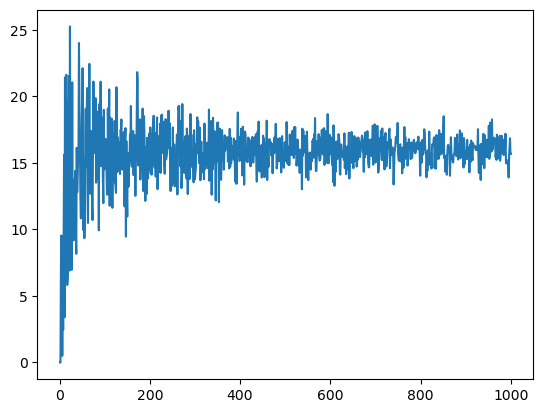

In [223]:
plt.plot([i for i in range(1,N+1)], res)

### Confidence interval

In [376]:
alpha = 0.05
F = norm.ppf(1-alpha/2)

In [381]:
MC = [np.sqrt(f_K(mu_opt, psi_))/len(psi) for psi_ in psi]
mean = sum([np.sqrt(f_K(mu_opt, psi_))/len(psi) for psi_ in psi]) 
var = sum([(psi_ - mean)**2 for psi_ in psi])/(len(psi)-1)

In [387]:
inf = [MC_ - F * np.sqrt(var)/np.sqrt(N) for MC_ in MC]
sup = [MC_ + F * np.sqrt(var)/np.sqrt(N) for MC_ in MC]
CI = [inf, sup]

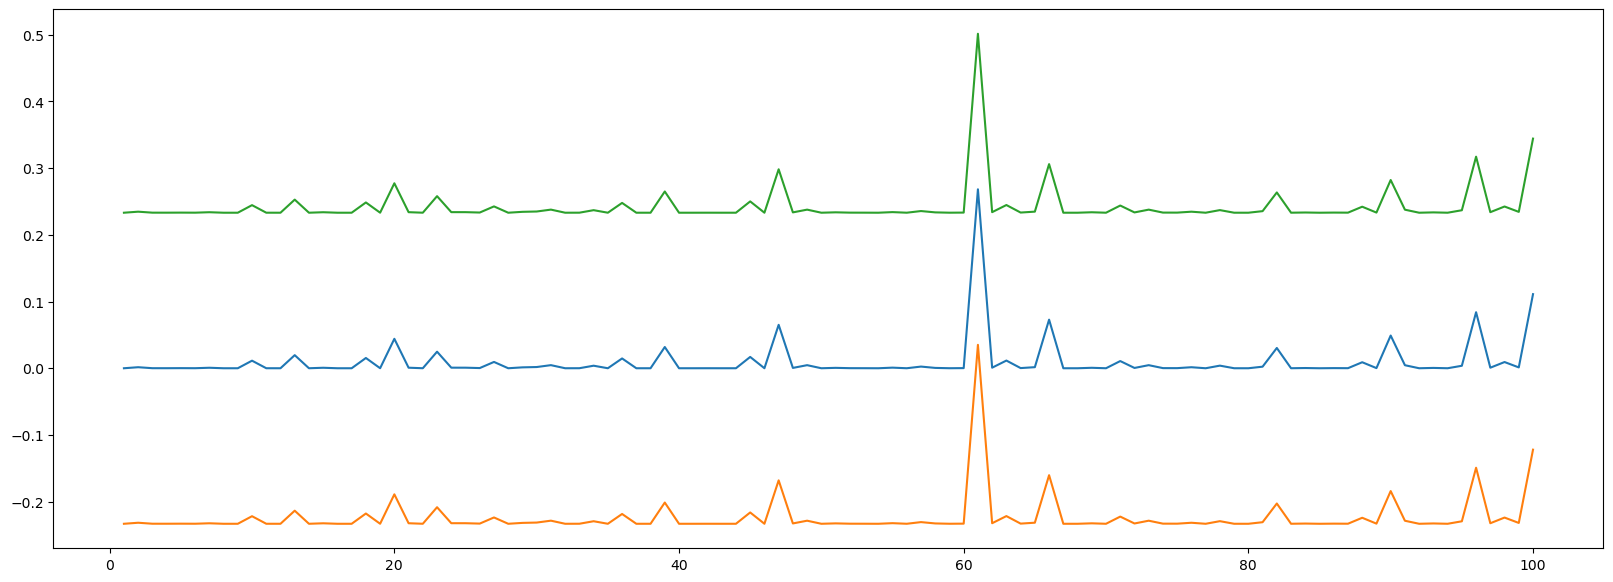

In [388]:
#K = si_carré
plt.figure(figsize=(20,7))

plt.plot([i for i in range(1,N+1)], [np.sqrt(f_K(mu_opt, psi_))/len(psi) for psi_ in psi], label = 'MC')
plt.plot([i for i in range(1,N+1)], CI[0], label = 'inf')
plt.plot([i for i in range(1,N+1)], CI[1], label = 'sup')